# U.S. Medical Insurance Costs
## 1st PRACTICE PROJECT
In this project, a **CSV** file with medical insurance costs is investigated using Python fundamentals. The project aims to analyse various attributes within the **insurance.csv** file to learn more about patient information. Ultimately, the analysis aims to provide insight into how individual factors impact insurance costs.

## SCOPE
#### GOALS
**Defined goals of the project:**
1. explore relevant methods of data analysis that have been learnt so far within the scope of this Data Science course;
2. practice identifying which relevant analysis methods should be performed;
3. utilise "Data Science Project Scoping Guide" to gain insight into sound scoping techniques;
4. draw reasonable conclusions from the data based on the analysis performed.

#### ACTIONS
**The actions/ interventions that the project aims to inform:**
1. identify which aspects of my current understanding of data science methods need more attention;
2. make notes of areas that lack understanding and need more practice.

#### DATA
**The data that the project has access to:**

**1. where is the data sourced from?**<br>
The data is available in the public domain on Kaggle and GitHub: "Medical Cost Personal Datasets".

**2. how is the data stored?**<br>
The data is stored on an CSV file.

**3. how often is the data collected?**<br>
The data is simulated on the basis of demographic statistics from the US Census Bureau, according to the book, "*Machine Learning with R*" by Brett Lantz, from which it came. This book provides an introduction to machine learning using R. All of the datasets are in the public domain but need some cleaning up and recoding to match the format in the book.

**4. what is its level of granularity?**<br>
Data granularity is the level of detail considered in a model or decision making process or represented in an analysis report. The greater the granularity, the deeper the level of detail.
For the scope of this project, the data is considered granular enough.

**5. how far back does the data go?**<br>
Unknown/ irrelevant.

**6. is there a collection bias?**<br>
This should be identified during the analysis.

**7. is there missing information?**<br>
The data does not appear to contain any missing fields.

#### ANALYSIS
**The analysis that can be done to explore the data and to identify any correlation between an individual's attributes and their insurance costs:**

Analysis for the columns: age, sex, bmi, children, smoker, region, charges
1. for age: average, spread
2. for sex: how many males, how many females, separate into lists
3. for bmi: average
4. for children: average
5. for smoker: number of yes, number of no
6. for region: number of unique regions, split into separate lists
7. for charge: average total

Visualisation:
1. age vs insurance cost
2. male/female vs average insurance cost
3. bmi vs cost
4. children vs cost
5. region vs average cost

## CONCLUSIONS
- Smoking was found to be the single most impactful factor on insurance costs between individuals. Trailing in 2nd and 3rd place are age and BMI, which also contribute to an increase in insurance cost, however, nowhere near as much as smoking.

- A non-smoking individual in the age group ’60+’ can expect an average insurance charge of as much as 4 times greater than an individual in the ’10-19’ age group. However, this can grow to be as much as 9 times greater for smokers in the ’60+’ age group compared to non-smokers in the ’10-19’ age group.

- There was no statistically significant difference between insurance costs of male and female non-smokers. However, male smokers should expect to pay on average 2,363.01 USD more than female smokers.

- The number of children and an individual's region were found to have no significant affect on an individual’s insurance cost. 

## ANALYSIS

In [93]:
#firstly, must import the relevant library for the file:
import csv

In [94]:
#create variables for attributes in insurance.csv to separate the data so that it is easier to work with:
age_lst = []
sex_lst = []
bmi_lst = []
children_lst = []
smoker_lst = []
region_lst = []
charge_lst = []

In [95]:
#create an csv.DictReader(file_name) object using the class DictReader() of the csv  module.
#This maps the information in each row to a dict, whose keys are given by the optional "fieldnames" parameter.
#The fieldnames parameter is a sequence.
#If fieldnames is omitted, the values in the first row of file will be used as the fieldnames
#Regardless of how the fieldnames are determined, the dictionary preserves their original ordering.

with open("insurance.csv", newline = '') as insurance_file:
    #print(insurance_file.read())
    #you can read the original data with the above line
    
    reader = csv.DictReader(insurance_file)
    for row in reader:
        age_lst.append(int(row['age']))
        sex_lst.append(row['sex'])
        bmi_lst.append(float(row['bmi']))
        children_lst.append(int(row['children']))
        smoker_lst.append(row['smoker'])
        region_lst.append(row['region'])
        charge_lst.append(float(row['charges']))
        
#print(age_lst, "\n\n")
#print(sex_lst, "\n\n")
#print(bmi_lst, "\n\n")
#print(children_lst, "\n\n")
#print(smoker_lst, "\n\n")
#print(region_lst, "\n\n")
#print(charge_lst, "\n\n")

In [96]:
import numpy as np

#with the data organised into individual lists, it is now possible to analyse the data.
#it is important to ensure that there are no missing fields for any individual before sorting into lists
#if there are, information will shift and will yield an erroneous analysis.

#define a class Individual that contains 7 methods of analysis for each category in insurance.csv:

class Individual:
    #the init method takes in each list parameter and returns the argument:
    def __init__(self, all_ages_lst, all_sexes_lst, all_bmis_lst, all_num_children_lst, 
                 all_smoker_status_lst, all_regions_lst, all_charges_lst):
        self.ages = all_ages_lst
        self.sexes = all_sexes_lst
        self.bmis = all_bmis_lst
        self.children = all_num_children_lst
        self.smoker = all_smoker_status_lst
        self.regions = all_regions_lst
        self.charges = all_charges_lst
        
    #method for age:
    def age_analysis(self):
        def average_calc(self):
            return np.mean(self.ages)
        def standard_deviation_calc(self):
            return np.std(self.ages)
        def range_calc(self):
            return np.max(self.ages) - np.min(self.ages)
        return "The average age is: {} years old. The standard deviation is {}. The range is {}.".format(round(average_calc(self), 2), round(standard_deviation_calc(self), 2), range_calc(self))
               
    #method for sex:
    def sex_analysis(self):
        def separation(self):
            males = []
            females = []
            for item in self.sexes:
                if item == 'male':
                    males.append(item)
                else:
                    females.append(item)
            return males, females
        
        num_males = len(separation(self)[0])
        num_females = len(separation(self)[1])
        return "There are {} males and {} females in the dataset.".format(num_males, num_females)
                
    #method for bmi:
    def bmi_analysis(self):
        def average_calc(self):
            return np.mean(self.bmis)
        def standard_deviation_calc(self):
            return np.std(self.bmis)
        return "The average bmi is: {}. The standard deviation is {}.".format(round(average_calc(self), 2), round(standard_deviation_calc(self), 2))

    #method for children:
    def children_analysis(self):
        return "The average number of children is {}.".format(round(np.mean(self.children)))
            
    #method for smoker:
    def smoker_analysis(self):
        def separation(self):
            smoker = []
            non_smoker = []
            for item in self.smoker:
                if item == 'yes':
                    smoker.append(item)
                else:
                    non_smoker.append(item)
            return smoker, non_smoker
        
        num_smokers = len(separation(self)[0])
        num_non_smokers = len(separation(self)[1])
        return "There are {} smokers and {} non-smokers in the dataset.".format(num_smokers, num_non_smokers)
    
    #method for region:
    def regions_analysis(self):
        def separation(self):
            unique_regions = {}
            for item in self.regions:
                if item not in unique_regions:
                    unique_regions[item] = 0
                else:
                    continue
            return unique_regions
        
        def regions_count(self):
            unique_regions = separation(self)
            for region in self.regions:
                unique_regions[region] += 1
            return unique_regions
            
        return """The number of individuals who live in each unique region:
        {}""".format(regions_count(self))
                
    #method for charges:
    def charges_analysis(self):
        def average_charge(self):
            return np.mean(self.charges)
        
        def average_charge_by_gender(self):
            males_charges = []
            females_charges = []
            for i in range(len(self.charges)):
                if self.sexes[i] == 'male':
                    males_charges.append(self.charges[i])
                else:
                    females_charges.append(self.charges[i])
            return np.mean(males_charges), np.mean(females_charges)
        
        return "The average insurance charge is {:.2f}$.\nThe average insurance charge for males is {:.2f}$. The average insurance charge for females is {:.2f}$.".format(average_charge(self), average_charge_by_gender(self)[0], average_charge_by_gender(self)[1])

        

In [97]:
#creating an instance of class Individual with all the lists as arguments:
dataset1 = Individual(age_lst, sex_lst, bmi_lst, children_lst, smoker_lst, region_lst, charge_lst)

#returning a result for ages:
print(dataset1.age_analysis())
print(dataset1.sex_analysis())
print(dataset1.bmi_analysis())
print(dataset1.children_analysis())
print(dataset1.smoker_analysis())
print(dataset1.regions_analysis())
print(dataset1.charges_analysis())

The average age is: 39.21 years old. The standard deviation is 14.04. The range is 46.
There are 676 males and 662 females in the dataset.
The average bmi is: 30.66. The standard deviation is 6.1.
The average number of children is 1.
There are 274 smokers and 1064 non-smokers in the dataset.
The number of individuals who live in each unique region:
        {'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
The average insurance charge is 13270.42$.
The average insurance charge for males is 13956.75$. The average insurance charge for females is 12569.58$.


## VISUALISING DATA

In [98]:
#import relevant tools:
from matplotlib import pyplot as plt
import seaborn as sns

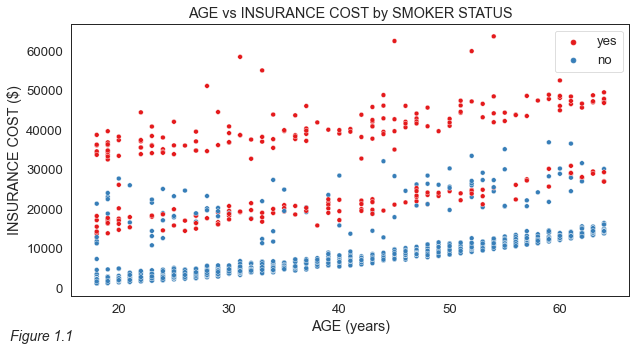

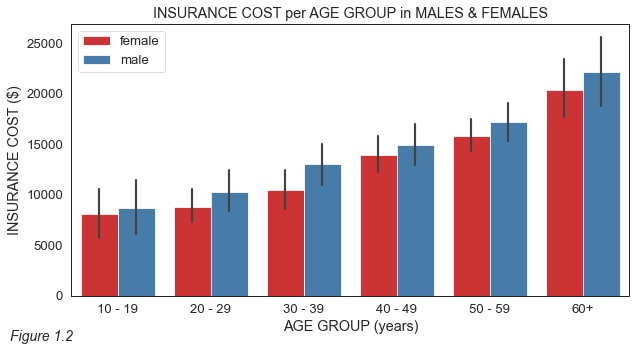

In [201]:
#1. age vs insurance cost analysis:

sns.set_palette('Set1', 10)

#age vs cost by smoker status scatter plot:
plt.figure(figsize = (10,5))
text = "Figure 1.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = age_lst, y = charge_lst, hue = smoker_lst, color = 'navy')
plt.title('AGE vs INSURANCE COST by SMOKER STATUS')
plt.xlabel('AGE (years)')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#age group vs cost:
age_group_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
age_ranges = [range(10, 20), range(20, 30), range(30, 40), range(40, 50), range(50, 60), range(60, 100)]
age_group_lst = []
for age in age_lst:
    for age_range in age_ranges:
        if age in age_range:
            if age_range[0] != 60:
                age_group_lst.append(f'{age_range[0]} - {age_range[-1]}')
            else:
                age_group_lst.append(f'{age_range[0]}+')
#print(age_ranges_lst)
#print(len(age_lst), len(age_ranges_lst))

plt.figure(figsize = (10, 5))
text = "Figure 1.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = age_group_lst,  y = charge_lst, hue = sex_lst, order = age_group_labels)
plt.title('INSURANCE COST per AGE GROUP in MALES & FEMALES')
plt.xlabel('AGE GROUP (years)')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

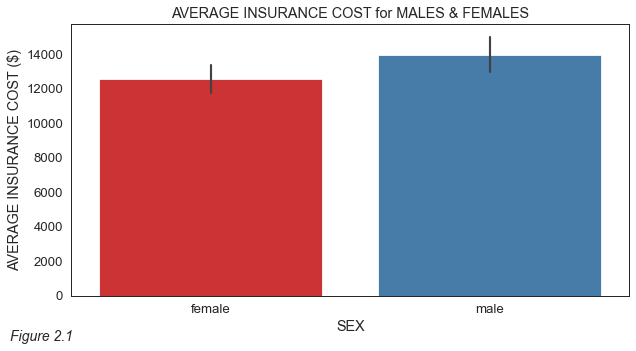

In [202]:
#2. male/ female vs average insurance cost analysis:

plt.figure(figsize = (10, 5))
text = "Figure 2.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = sex_lst, y = charge_lst)
plt.title('AVERAGE INSURANCE COST for MALES & FEMALES')
plt.xlabel('SEX')
plt.ylabel('AVERAGE INSURANCE COST ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

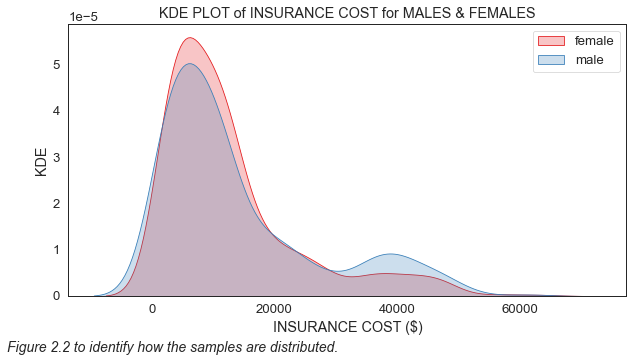

Standard deviation of the female sample:  11120.3
Standard deviation of the male sample:  12961.43
All males and all females twosample t-test p-value:  0.035841014956016645




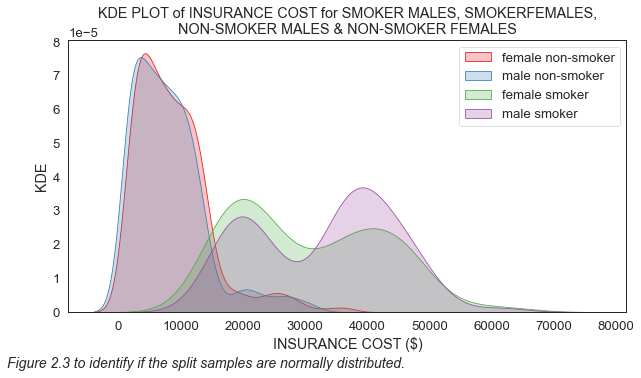

Standard deviation for non-smoker females sample:  6055.23
Standard deviation for non-smoker males sample:  5902.39
Average insurance cost for non-smoker females:  8762.3
Average insurance cost for non-smoker males:  8087.2
Non-smoker females and non-smoker males two sample t-test p-value:  0.06610296328675346


Average insurance cost for smoker females:  30679.0
Average insurance cost for smoker males:  33042.01


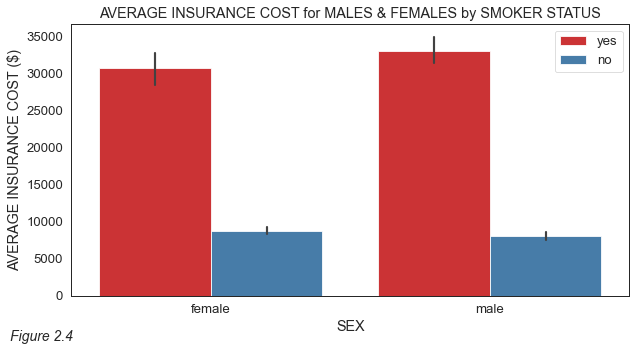

In [206]:
from scipy.stats import ttest_ind
#two sample t-test for sample of females and sample of males:
#assumptions:
#1. samples are approximately normally distributed
#2. standard deviations of the samples are equal
#3. samples are independent

#kde plot of male and female samples:
#split charges into separate lists of males and females
male_charges = []
female_charges = []
for i in range(len(charge_lst)):
    if sex_lst[i] == 'male':
        male_charges.append(charge_lst[i])
    else:
        female_charges.append(charge_lst[i])

plt.figure(figsize = (10, 5))
text = "Figure 2.2 to identify how the samples are distributed."
plt.figtext(0.04, -0.03, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.kdeplot(female_charges, shade = True)
sns.kdeplot(male_charges, shade = True)
plt.title('KDE PLOT of INSURANCE COST for MALES & FEMALES')
plt.xlabel('INSURANCE COST ($)')
plt.ylabel('KDE')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)
plt.legend(['female', 'male'])

plt.show()
#both distributions are bimodal due to the smoker status influence

female_std = round(np.std(female_charges), 2)
male_std = round(np.std(male_charges), 2)
print('Standard deviation of the female sample: ', female_std)
print('Standard deviation of the male sample: ', male_std)
#the stds of these distributions are not equal
#the samples can be assumed to be independent

#the NULL hypothesis: there is no difference between insurance costs of males and females
#ALTERNATIVE hypothesis: males are charged significantly more for insurance than females
#significance threshold = 0.05

#the 2 sample t-test:
pval = ttest_ind(female_charges, male_charges, equal_var = False)[1]
print('All males and all females twosample t-test p-value: ', pval)
print('\n')
#0.035841014956016645
#this implies that the null hypothesis can be rejected

#splitting the samples further by smoker status:
male_charges_smoker = []
female_charges_smoker = []
male_charges_nonsmoker = []
female_charges_nonsmoker = []
for i in range(len(charge_lst)):
    if sex_lst[i] == 'male' and smoker_lst[i] == 'yes':
        male_charges_smoker.append(charge_lst[i])
    elif sex_lst[i] == 'male' and smoker_lst[i] == 'no':
        male_charges_nonsmoker.append(charge_lst[i])
    if sex_lst[i] == 'female' and smoker_lst[i] == 'yes':
        female_charges_smoker.append(charge_lst[i])
    elif sex_lst[i] == 'female' and smoker_lst[i] == 'no':
        female_charges_nonsmoker.append(charge_lst[i])

plt.figure(figsize = (10, 5))
text = "Figure 2.3 to identify if the split samples are normally distributed."
plt.figtext(0.04, -0.03, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.kdeplot(female_charges_nonsmoker, shade = True)
sns.kdeplot(male_charges_nonsmoker, shade = True)
sns.kdeplot(female_charges_smoker, shade = True)
sns.kdeplot(male_charges_smoker, shade = True)
plt.title('KDE PLOT of INSURANCE COST for SMOKER MALES, SMOKERFEMALES,\nNON-SMOKER MALES & NON-SMOKER FEMALES')
plt.xlabel('INSURANCE COST ($)')
plt.ylabel('KDE')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)
plt.legend(['female non-smoker', 'male non-smoker', 'female smoker', 'male smoker'])

plt.show()

#focusing just on the non-smoking males and females:
female_nonsmoker_std = round(np.std(female_charges_nonsmoker), 2)
male_nonsmoker_std = round(np.std(male_charges_nonsmoker), 2)
print('Standard deviation for non-smoker females sample: ', female_nonsmoker_std)
print('Standard deviation for non-smoker males sample: ', male_nonsmoker_std)
#the stds of these distributions are approximately equal
#the samples can be assumed to be independent

#the NULL hypothesis: there is no difference between insurance costs of non-smoker males and non-smoker females
#ALTERNATIVE hypothesis: non-smoker males are charged significantly more for insurance than non-smoker females
#significance threshold = 0.05

#the 2 sample t-test:
female_nonsmoker_average = round(np.mean(female_charges_nonsmoker), 2)
male_nonsmoker_average = round(np.mean(male_charges_nonsmoker), 2)
print('Average insurance cost for non-smoker females: ', female_nonsmoker_average)
print('Average insurance cost for non-smoker males: ', male_nonsmoker_average)
pval = ttest_ind(female_charges_nonsmoker, male_charges_nonsmoker, equal_var = False)[1]
print('Non-smoker females and non-smoker males two sample t-test p-value: ', pval)
print('\n')
#0.06610296328675346
#the null hypothesis is true

print('Average insurance cost for smoker females: ', round(np.mean(female_charges_smoker), 2))
print('Average insurance cost for smoker males: ', round(np.mean(male_charges_smoker), 2))

#average insurance cost for males and females split by smokers and non-smokers:
plt.figure(figsize = (10, 5))
text = "Figure 2.4"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = sex_lst, y = charge_lst, hue = smoker_lst)
plt.title('AVERAGE INSURANCE COST for MALES & FEMALES by SMOKER STATUS')
plt.xlabel('SEX')
plt.ylabel('AVERAGE INSURANCE COST ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

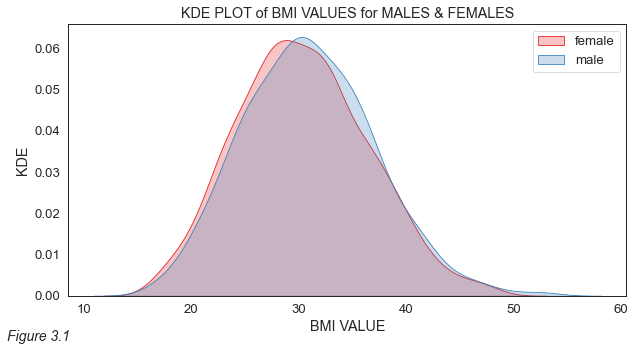

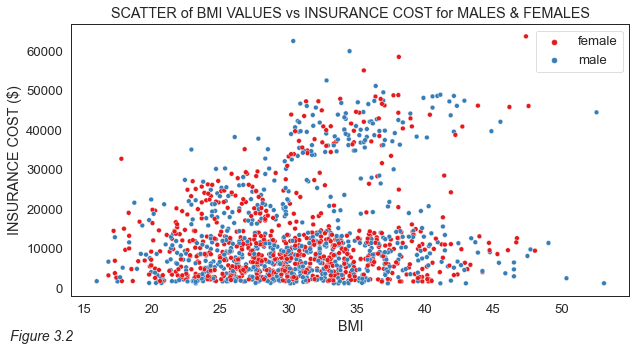

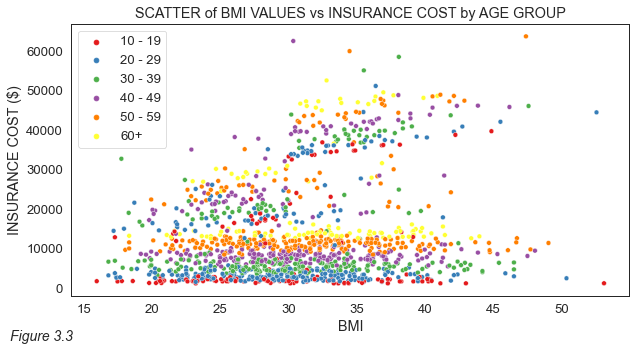

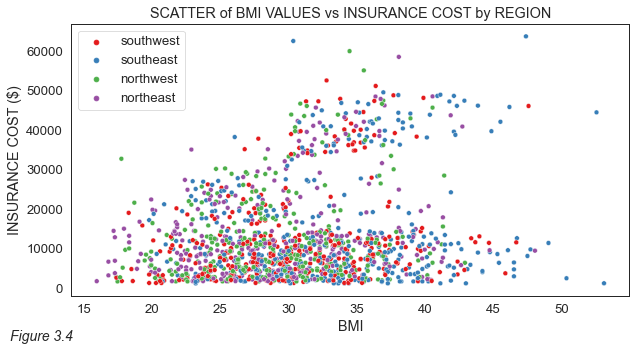

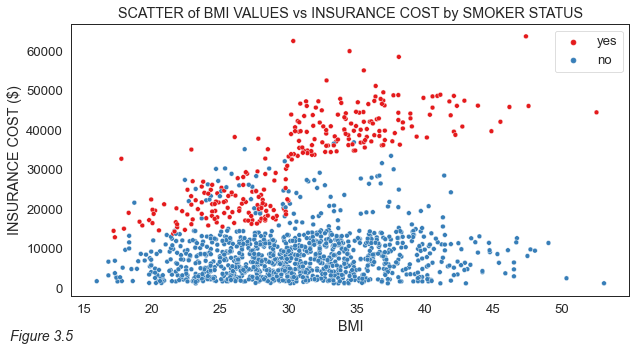

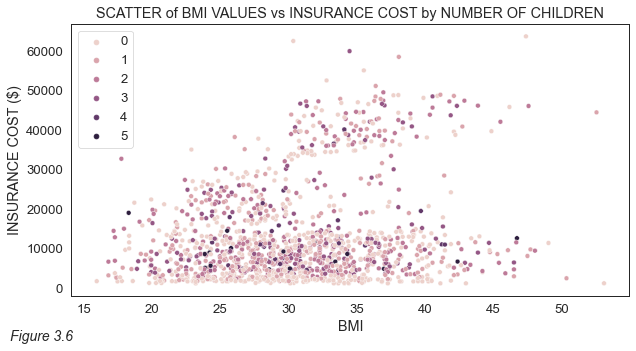

In [205]:
#3. bmi vs charge analysis:

#bmi spit by gender:
males_bmi = []
females_bmi = []
for i in range(len(charge_lst)):
    if sex_lst[i] == 'male':
        males_bmi.append(bmi_lst[i])
    else:
        females_bmi.append(bmi_lst[i])

#bmi histogram:
plt.figure(figsize = (10, 5))
text = "Figure 3.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.kdeplot(females_bmi, shade = True)
sns.kdeplot(males_bmi, shade = True)
plt.title('KDE PLOT of BMI VALUES for MALES & FEMALES')
plt.xlabel('BMI VALUE')
plt.ylabel('KDE')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)
plt.legend(['female', 'male'])

plt.show()


#bmi vs charge by gender:
plt.figure(figsize = (10, 5))
text = "Figure 3.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_lst, y = charge_lst, hue = sex_lst)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST for MALES & FEMALES')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#bmi vs charge by age:
plt.figure(figsize = (10, 5))
text = "Figure 3.3"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_lst, y = charge_lst, hue = age_group_lst, hue_order = age_group_labels)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by AGE GROUP')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#bmi vs charge by region:
plt.figure(figsize = (10, 5))
text = "Figure 3.4"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_lst, y = charge_lst, hue = region_lst)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by REGION')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#bmi vs charge by smoker/non-smoker:
plt.figure(figsize = (10, 5))
text = "Figure 3.5"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_lst, y = charge_lst, hue = smoker_lst)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by SMOKER STATUS')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#bmi vs charge by children:
plt.figure(figsize = (10, 5))
text = "Figure 3.6"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_lst, y = charge_lst, hue = children_lst)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by NUMBER OF CHILDREN')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

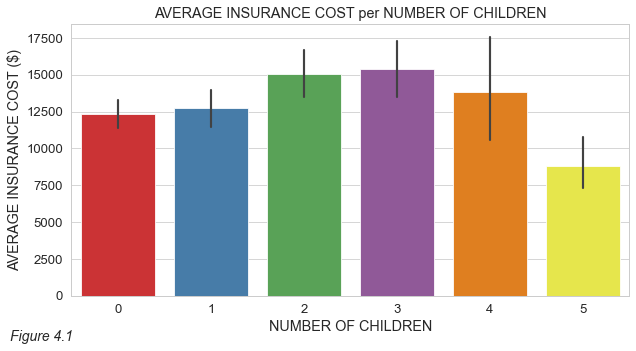

In [219]:
#4. children vs charge analysis:

plt.figure(figsize = (10, 5))
text = "Figure 4.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = children_lst, y = charge_lst)
plt.title('AVERAGE INSURANCE COST per NUMBER OF CHILDREN')
plt.xlabel('NUMBER OF CHILDREN')
plt.ylabel('AVERAGE INSURANCE COST ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

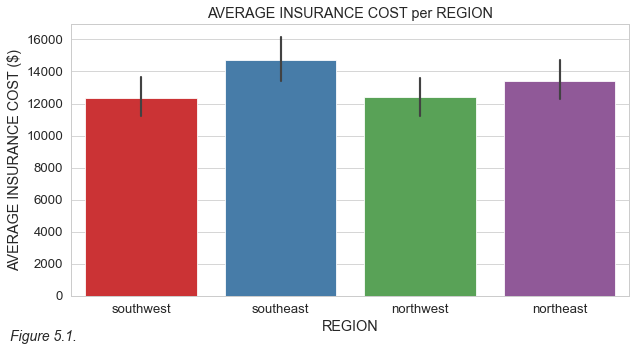

Number of smokers in southwest region:  58
Number of smokers in southeast region:  91
Number of smokers in northwest region:  58
Number of smokers in northeast region:  67


In [220]:
#5. region vs average charge

plt.figure(figsize = (10, 5))
text = "Figure 5.1."
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = region_lst, y = charge_lst)
plt.title('AVERAGE INSURANCE COST per REGION')
plt.xlabel('REGION')
plt.ylabel('AVERAGE INSURANCE COST ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#smokers in each region:

southwest_smokers = []
southeast_smokers = []
northwest_smokers = []
northeast_smokers = []

for i in range(len(charge_lst)):
    if region_lst[i] == 'southwest' and smoker_lst[i] == 'yes':
        southwest_smokers.append(charge_lst[i])
    elif region_lst[i] == 'southeast' and smoker_lst[i] == 'yes':
        southeast_smokers.append(charge_lst[i])
    elif region_lst[i] == 'northwest' and smoker_lst[i] == 'yes':
        northwest_smokers.append(charge_lst[i])
    elif region_lst[i] == 'northeast' and smoker_lst[i] == 'yes':
        northeast_smokers.append(charge_lst[i])
print('Number of smokers in southwest region: ', len(southwest_smokers))
print('Number of smokers in southeast region: ', len(southeast_smokers))
print('Number of smokers in northwest region: ', len(northwest_smokers))
print('Number of smokers in northeast region: ', len(northeast_smokers))

## MACHINE LEARNING - MULTIPLE LINEAR REGRESSION

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('insurance.csv')

#print(df.head())
#print(df.dtypes)

#splitting into training and testing set:
x1 = df[['age', 'bmi', 'children']]
y1 = df[['charges']]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state = 6)

mlr1 = LinearRegression()
mlr1.fit(x1_train, y1_train)

y1_predicted = mlr1.predict(x1_test)

#assessing the accuracy of the model with residual analysis:
r_squared1 = mlr1.score(x1_test, y1_test)
print(r_squared1)
#age, bmi and children yield an R**2 value of 0.06486747163642559
#this means these variables hardly account for the variation seen in the data (looking for R**2 values of 0.7 and higher)

df.sex = df.sex.map({'female': 1, 'male': 0})
df.smoker = df.smoker.map({'yes': 1, 'no': 0})
#print(df.head())
#print(df.dtypes)

#splitting into training and testing set:
x2 = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y2 = df[['charges']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state = 6)

mlr2 = LinearRegression()
mlr2.fit(x2_train, y2_train)

y2_predicted = mlr2.predict(x2_test)

r_squared2 = mlr2.score(x2_test, y2_test)
print(r_squared2)
#with sex and smoker columns added, the R**2 value is now 0.778883116737676
#these variables together account for 78% variation in y_predicted from y_actual
#the most impactful variable is smoker status
#removing just the smoker column, the R**2 value drops to 0.06736123573269259
#regions variable was not included in the analysis

#including regions variable in the analysis:
#df = pd.get_dummies(data = df, columns = ['region'])
#print(df.head())

#splitting into training and testing set:
#x3 = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
#y3 = df[['charges']]

#x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8, test_size = 0.2, random_state = 6)

#mlr3 = LinearRegression()
#mlr3.fit(x3_train, y3_train)

#y3_predicted = mlr3.predict(x3_test)

#assessing the accuracy of the model2:
#residual analysis:
#r_squared3 = mlr3.score(x3_test, y3_test)
#print(r_squared3)
# R**2 is now 0.7772568430294239 (actually went down slightly)

0.06486747163642559
0.778883116737676


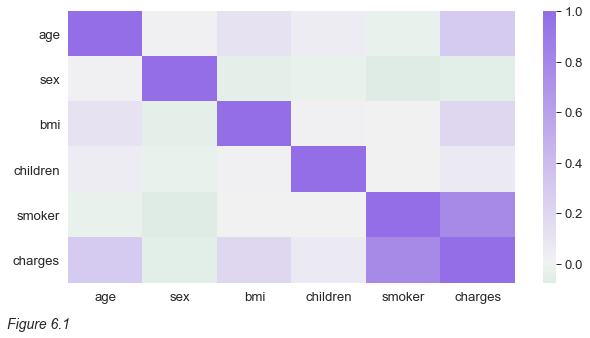

In [222]:
#heatmap of all features:

plt.figure(figsize = (10,5))
text = "Figure 6.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

colors = sns.diverging_palette(150, 275, s = 80, l = 55, n = 9, as_cmap = True)
sns.heatmap(df.corr(), center = 0, cmap = colors, robust = True)

plt.show()

## DISCUSSION OF RESULTS

- The average insurance charge in the entire sample is 13270.42 USD.

#### AGE
- The average age is: 39.21 years old. The standard deviation is 14.04. The range is 46.

- Figure 1.1 is a scatter graph of age versus insurance cost, split by smoker status. Looking at Figure 1.1, as well as the average age value of 39.21 and standard deviation of 14.04, it is evident that there is a good representation of people of a wide variety of ages in the dataset. This implies that there should be little to no age bias in the dataset, which could significantly impact the results of this analysis.

- The general trend of increasing insurance cost with age can be seen. Yet, for young smokers, the insurance cost can be higher than for much older non-smokers, indicating that smoker status is a much more powerful predictor of insurance cost than age is.

- Increasing insurance cost with age is best seen from Figure 1.2, which also implies that males are consistently charged more for insurance that females in all age groups (more on this later).

- A non-smoking individual in the age group ’60+’ can expect an average insurance charge of as much as 4 times greater than an individual in the ’10-19’ age group. This can grow to be as much as 9 times greater for smokers in the ’60+’ age group compared to non-smokers in the ’10-19’ age group, indicating once again, that smoking significantly increases the cost of insurance.

#### GENDER
- There are 676 males and 662 females in the dataset and is very evenly split. The data does not indicate whether transgender individuals are present.

- The average insurance charge for males is 13956.75 USD, while the average insurance charge for females is 12569.58 USD, which is represented visually in Figure 2.1. The fact that females appear to pay less for insurance has already been stated, however, upon further analysis, it becomes apparent that this is far from the full story. 

- There are 274 smokers and 1064 non-smokers in the dataset. Splitting the female and male samples by smoker status reveals that:

    1. Whether a male individual pays more for insurance than a female individual is significantly affected by whether the male is a smoker, which can be observed on Figure 2.3<br>
    2. Male smokers pay on average 2,363.01 USD more than female smokers.
    3. Figure 2.3 shows that both smoker distributions are, in fact, bimodal, which indicates that there is another factor that significantly impacts the final insurance cost in the smoker sample.<br>
    4. In non-smokers, males are observed to pay on average 675.10 USD *less* than females, however upon further analysis, this was not found to be a statistically significant difference (p-value = 0.066 of two-sample t-test for a significance threshold of 0.05, assuming samples are normally distributed, have approximately equal standard deviations, and are independent).<br>

#### BMI
- The average BMI in dataset is: 30.66. The standard deviation of BMI values is 6.1.

- From Figure 3.1, it can be seen that both, male and female BMI values are almost identical and normally distributed.

- Figure 3.2 depicts the scatter of BMI values for males and females. Whilst no male-female segregation in BMI values or insurance costs is observed, the scatter graph shows potentially three distinct plots, implying that at least one another variable significantly varies insurance cost for individuals of the same BMI and gender.

- Figure 3.3 shows the BMI versus insurance cost scatter split by age group. There is no affect of age on BMI values. However, the three vertical layers can be seen again, where within each layer, insurance cost rises predictably with age. This indicates that there are 3 distinct groups, determined by some factor, which splits individuals into low, medium, and high insurance cost brackets. In each bracket, other variables such as age group, further bump up the price. 

- Figure 3.4 shows BMI versus insurance cost split by region. There is no observable affect of region on BMI, and no segregation of insurance cost by region, implying that region doesn’t significantly affect insurance cost.

- Figure 3.5 shows BMI versus insurance cost split by smoker status. This is where the three layers are revealed:

    1. The lowest insurance cost bracket contains a large proportion of non-smokers with a wide range of BMI values;<br>
	2. The medium insurance cost bracket contains smokers with a BMI value less than 30, and some non-smokers with a high BMI value as well as non-smokers with low BMI value, who could potentially have other unfavourable attributes;<br>
	3. The high insurance cost bracket, which contains mostly smokers with a high BMI value.<br>

- The above indicates that smokers and non-smokers are treated differently, with the single biggest factor affecting insurance cost in the smokers is BMI value. Meanwhile, it is not immediately clear what, if not a high BMI, could put a non-smoking individual into the medium insurance cost bracket.

- Figure 3.6 shows BMI versus insurance cost split by number of children. No significant relationship between number of children, BMI, and insurance cost can be seen from this graph.

#### NUMBER OF CHILDREN
- The average number of children is 1.

- It is not immediately clear whether a statistically significant trend exists between insurance cost and number of children without further analysis.

#### REGION
- The number of individuals who live in each unique region:
{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}

- Each region appears to be equally represented in the dataset.

- The southeast region appears to have the highest insurance costs compared to the other three regions.

- Upon further analysis, it was discovered that there are a lot more smokers in the southeast region compared to other regions in the dataset (91 smokers compared to 58, 58, and 61 in southwest, northwest, and northeast respectively), which likely skews the result.

- Hence, it cannot be said with certainty that an individual’s region significantly impacts insurance cost without further investigation.

#### MACHINE LEARNING - MULTIPLE LINEAR REGRESSION
- Multiple linear regression model was found to be a good predictor of an individual’s insurance cost based on the following attributes: age, sex, BMI, children, and smoker status with an R^2 value of 0.7789.

- Removing the smoker status attribute dropped the R^2 to 0.0674 indicating that smoker is the single biggest factor accounting for over 70% variation between predicted and actual insurance costs of individuals.

## CONCLUSIONS
- Smoking was found to be the single most impactful factor on insurance costs between individuals. Trailing in 2nd and 3rd place are age and BMI, which also contribute to an increase in insurance cost, however, nowhere near as much as smoking.

- A non-smoking individual in the age group ’60+’ can expect an average insurance charge of as much as 4 times greater than an individual in the ’10-19’ age group. However, this can grow to be as much as 9 times greater for smokers in the ’60+’ age group compared to non-smokers in the ’10-19’ age group.

- There was no statistically significant difference between insurance costs of male and female non-smokers. However, male smokers should expect to pay on average 2,363.01 USD more than female smokers.

- The number of children and an individual's region were found to have no significant affect on an individual’s insurance cost. 